Total sum for Duration: 1.2248321919999994
Operations sorted by total duration for Duration:
Operation: matmul, dtype:F32, Duration: 0.5349550080000001, Count: 14026 Perc:43.68%
Operation: binary op:Mult, dtype:F32, pipeline:BinaryBufferFromBuffer, Duration: 0.17737728, Count: 12240 Perc:14.48%
Operation: copy2d dtype:F32, Duration: 0.155580384, Count: 12216 Perc:12.70%
Operation: binary op:Add, dtype:F32, pipeline:BinaryBufferFromBufferContiguousBoth, Duration: 0.064373824, Count: 6120 Perc:5.26%
Operation: copy strided dtype:F32, Duration: 0.03979875200000001, Count: 3048 Perc:3.25%
Operation: rms_norm, dtype:F32, Duration: 0.039563296000000005, Count: 3315 Perc:3.23%
Operation: binary op:Minus, dtype:F32, pipeline:BinaryBufferFromBufferContiguousBoth, Duration: 0.03078144, Count: 3066 Perc:2.51%
Operation: unary op:Affine, dtype:F32, pipeline:UnaryFromBufferContiguous, Duration: 0.029497344, Count: 3060 Perc:2.41%
Operation: unary op:Exp, dtype:F32, pipeline:UnaryFromBufferContiguou

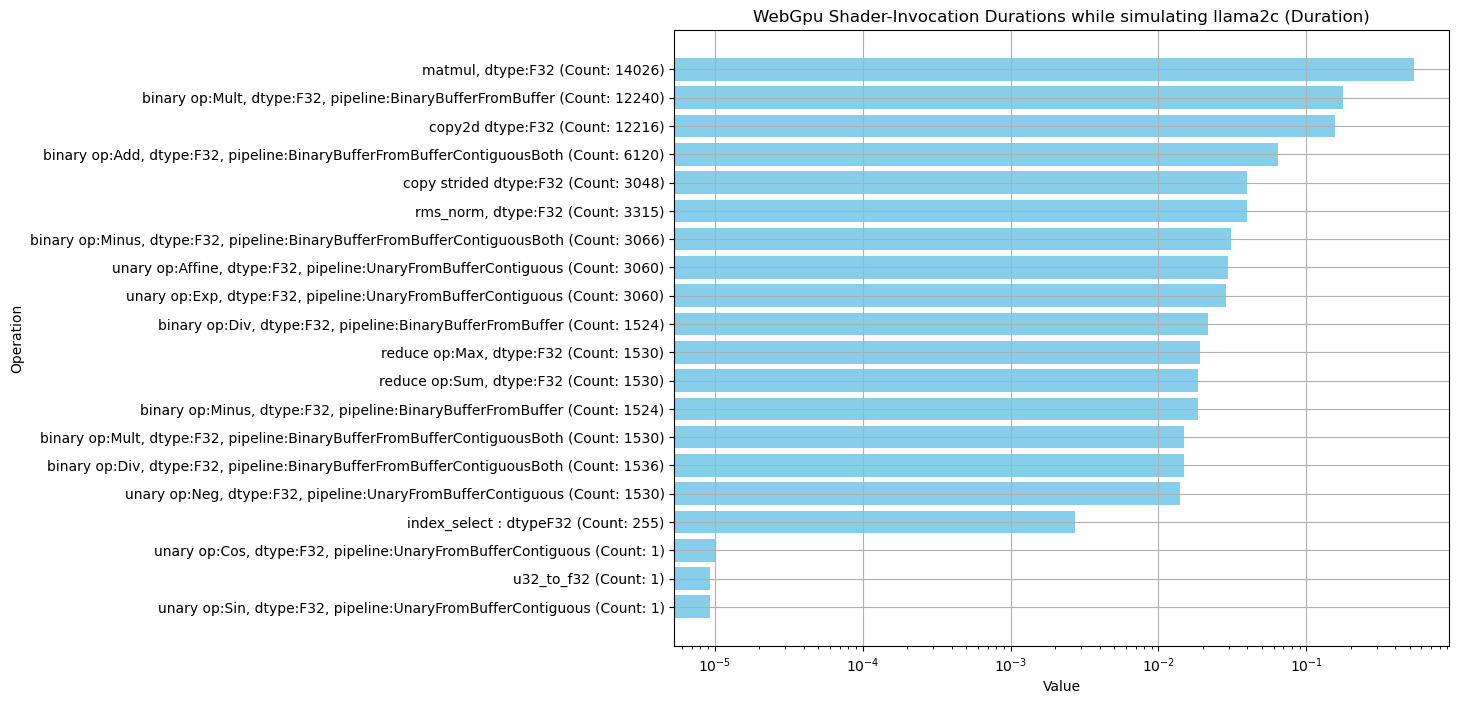

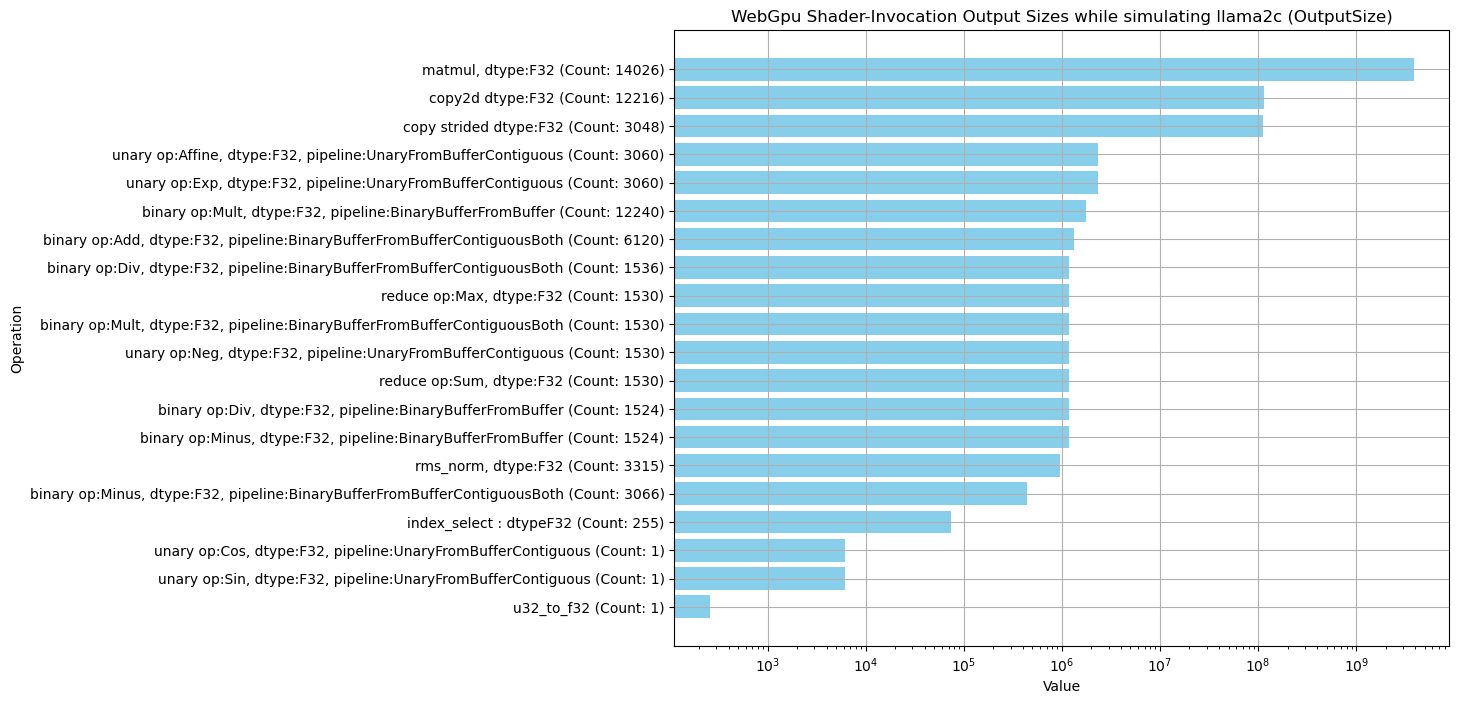

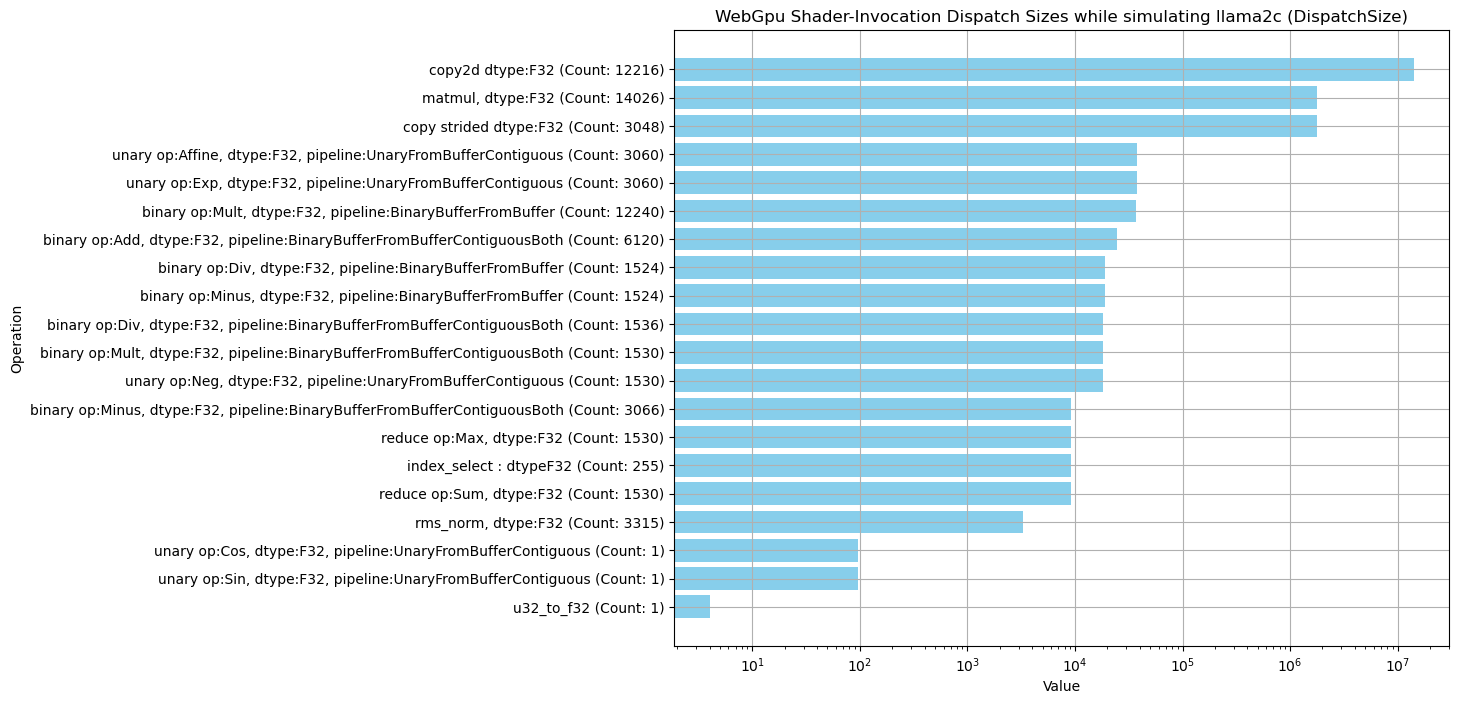

In [2]:
import json
import matplotlib.pyplot as plt

# Load JSON data from a file
with open('candle-examples\wgpu_infollama2-c_small.json', 'r') as file:
    data = json.load(file)

 
# Separate the data by measurement type
duration_data = [op for op in data if op['m_type'] == 'Duration']
output_size_data = [op for op in data if op['m_type'] == 'OutputSize']
dispatch_size_data = [op for op in data if op['m_type'] == 'DispatchSize']

# Function to process data for plotting
def process_data(data):
    for operation in data:
        operation['value'] = operation['count'] * operation['mean']
    
    sorted_operations = sorted(data, key=lambda x: x['value'], reverse=True)
    
    labels = [f"{op['label']} (Count: {op['count']})" for op in sorted_operations]
    values = [op['value'] for op in sorted_operations]
    total_sum = sum(values)
    
    # Print the operations along with their values
    print(f"Total sum for {data[0]['m_type']}: {total_sum}")
    print(f"Operations sorted by total {data[0]['m_type'].lower()} for {data[0]['m_type']}:")
    for operation in sorted_operations:
        print(f"Operation: {operation['label']}, {data[0]['m_type']}: {operation['value']}, Count: {operation['count']} Perc:{operation['value']/total_sum:.2%}")
    
    return labels, values

# Process data for each measurement type
duration_labels, duration_values = process_data(duration_data)
output_size_labels, output_size_values = process_data(output_size_data)
dispatch_size_labels, dispatch_size_values = process_data(dispatch_size_data)

# Function to plot data
def plot_data(labels, values, title):
    plt.figure(figsize=(10, 8))
    plt.barh(labels, values, color='skyblue')
    plt.grid()
    plt.xscale('log')
    plt.xlabel('Value')
    plt.ylabel('Operation')
    plt.title(title)
    plt.gca().invert_yaxis()  # To have the longest value at the top
    plt.show()

# Plot data for each measurement type
plot_data(duration_labels, duration_values, 'WebGpu Shader-Invocation Durations while simulating llama2c (Duration)')
plot_data(output_size_labels, output_size_values, 'WebGpu Shader-Invocation Output Sizes while simulating llama2c (OutputSize)')
plot_data(dispatch_size_labels, dispatch_size_values, 'WebGpu Shader-Invocation Dispatch Sizes while simulating llama2c (DispatchSize)')

total_sum: 141503845690.96048
Operations sorted by execution time (duration):
Operation: matmul, dtype:F32, Duration: 137641802752.0, Count: 440 Perc:0.972707152091152
Operation: softmax, dtype:F32, Duration: 1464566784.0, Count: 32 Perc:0.01035001400031603
Operation: binary op:Add, dtype:F32, pipeline:BinaryBufferFromBuffer, Duration: 578012576.0, Count: 535 Perc:0.004084783513674671
Operation: reduce op:Sum, dtype:F32, Duration: 326453792.0, Count: 342 Perc:0.00230703123583626
Operation: binary op:Mult, dtype:F32, pipeline:BinaryBufferFromBuffer, Duration: 254779200.0, Count: 176 Perc:0.0018005107829820327
Operation: copy strided dtype:F32, Duration: 171230976.0, Count: 240 Perc:0.0012100800170050682
Operation: binary op:Minus, dtype:F32, pipeline:BinaryBufferFromBuffer, Duration: 164080672.0, Count: 183 Perc:0.001159549206587265
Operation: binary op:Div, dtype:F32, pipeline:BinaryBufferFromBuffer, Duration: 164080672.0, Count: 183 Perc:0.001159549206587265
Operation: unary op:Square

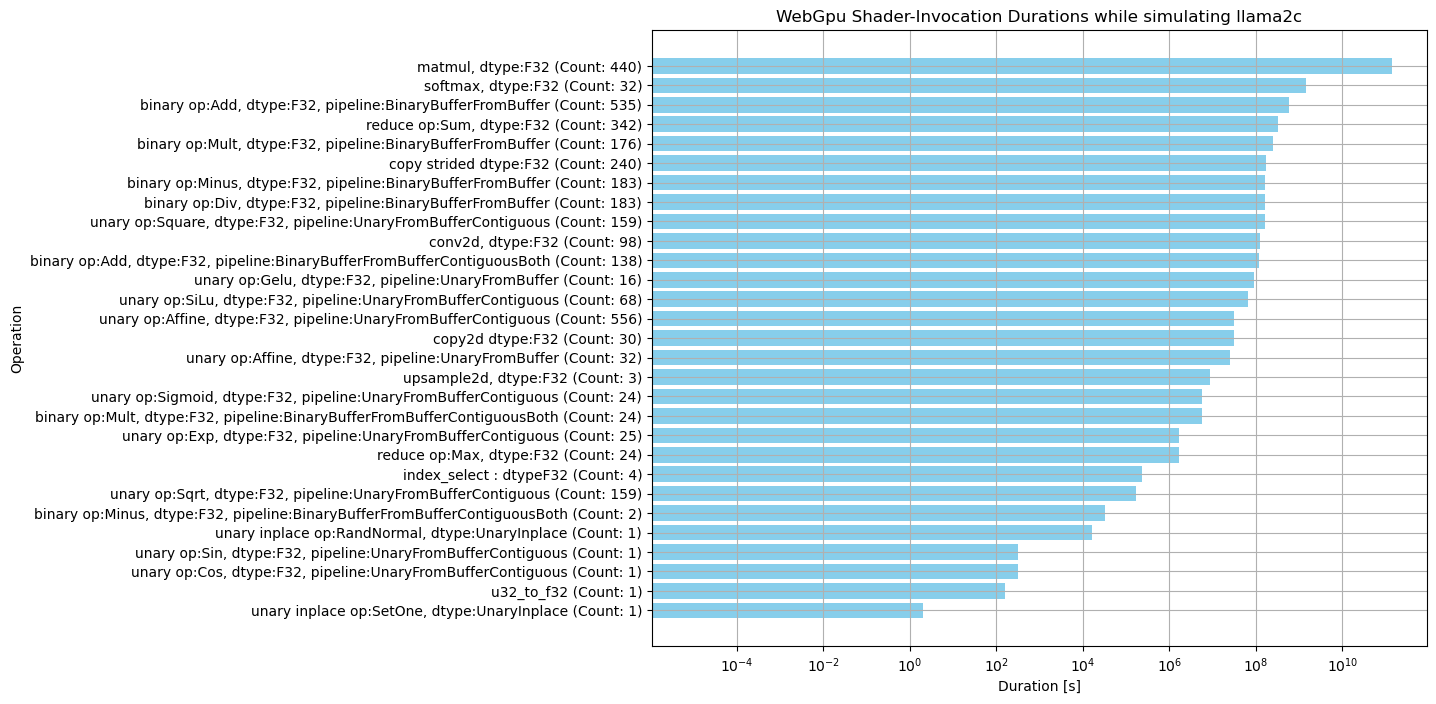

In [3]:
import json
import matplotlib.pyplot as plt

# Load JSON data from a file
with open('candle-examples\wgpu_infostable_defusion_small.json', 'r') as file:
    data = json.load(file)

    # Add a new key for duration to each operation
for operation in data:
    operation['duration'] = operation['count'] * operation['mean']

# Sort the list of operations by duration in descending order
sorted_operations = sorted(data, key=lambda x: x['duration'], reverse=True)


# Extract labels and durations for plotting
labels = [f"{op['label']} (Count: {op['count']})" for op in sorted_operations]
#labels = [op['label'] for op in sorted_operations]
durations = [op['duration'] for op in sorted_operations]
total_sum = sum(durations)
print(f"total_sum: {sum(durations)}")

# Print the operations along with their durations
print("Operations sorted by execution time (duration):")
for operation in sorted_operations:
    print(f"Operation: {operation['label']}, Duration: {operation['duration']}, Count: {operation['count']} Perc:{operation['duration']/total_sum}")


# Create a bar plot
plt.figure(figsize=(10, 8))
plt.barh(labels, durations, color='skyblue')
plt.grid()
plt.xscale('log')
plt.xlabel('Duration [s]')
plt.ylabel('Operation')
plt.title('WebGpu Shader-Invocation Durations while simulating llama2c')
plt.gca().invert_yaxis()  # To have the longest duration at the top
plt.show()


Total sum for Duration: 11.866748896000006
Operations sorted by total duration for Duration:
Operation: conv2d, dtype:F32, Duration: 7.830529024, Count: 98 Perc:65.99%
Operation: matmul, dtype:F32, Duration: 3.5926599680000004, Count: 440 Perc:30.28%
Operation: binary op:Add, dtype:F32, pipeline:BinaryBufferFromBuffer, Duration: 0.105396224, Count: 535 Perc:0.89%
Operation: binary op:Mult, dtype:F32, pipeline:BinaryBufferFromBuffer, Duration: 0.07654707200000001, Count: 176 Perc:0.65%
Operation: reduce op:Sum, dtype:F32, Duration: 0.052244479999999996, Count: 342 Perc:0.44%
Operation: unary op:Gelu, dtype:F32, pipeline:UnaryFromBuffer, Duration: 0.045845504, Count: 16 Perc:0.39%
Operation: softmax, dtype:F32, Duration: 0.041930752, Count: 32 Perc:0.35%
Operation: binary op:Minus, dtype:F32, pipeline:BinaryBufferFromBuffer, Duration: 0.025721855999999998, Count: 183 Perc:0.22%
Operation: binary op:Div, dtype:F32, pipeline:BinaryBufferFromBuffer, Duration: 0.019609599999999998, Count: 18

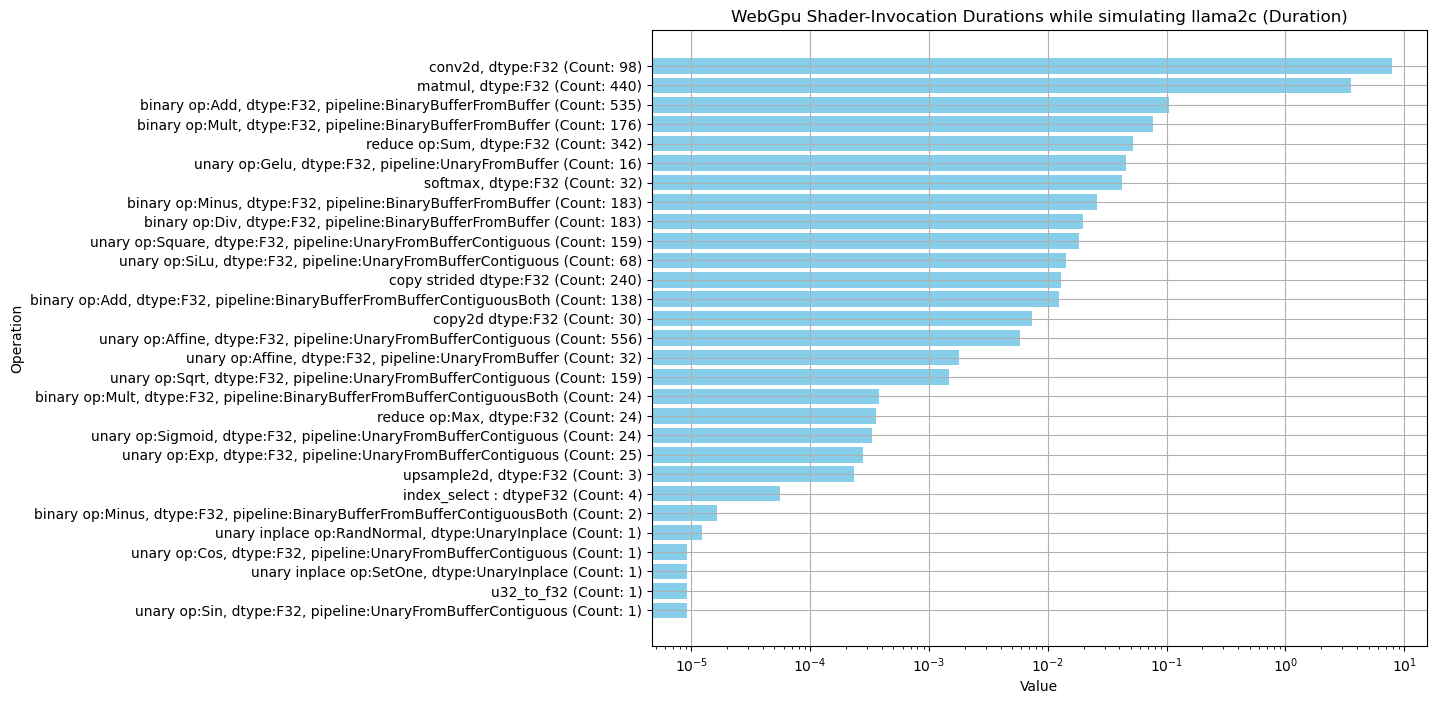

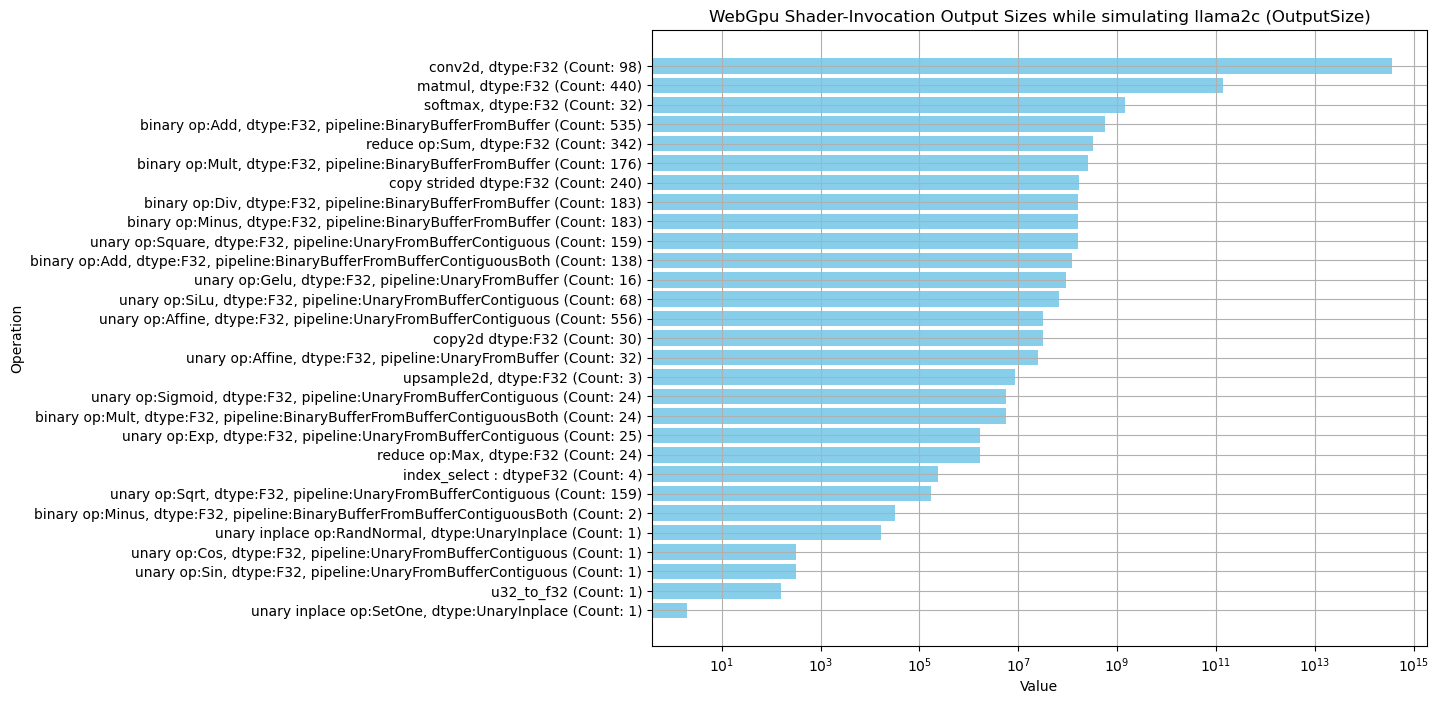

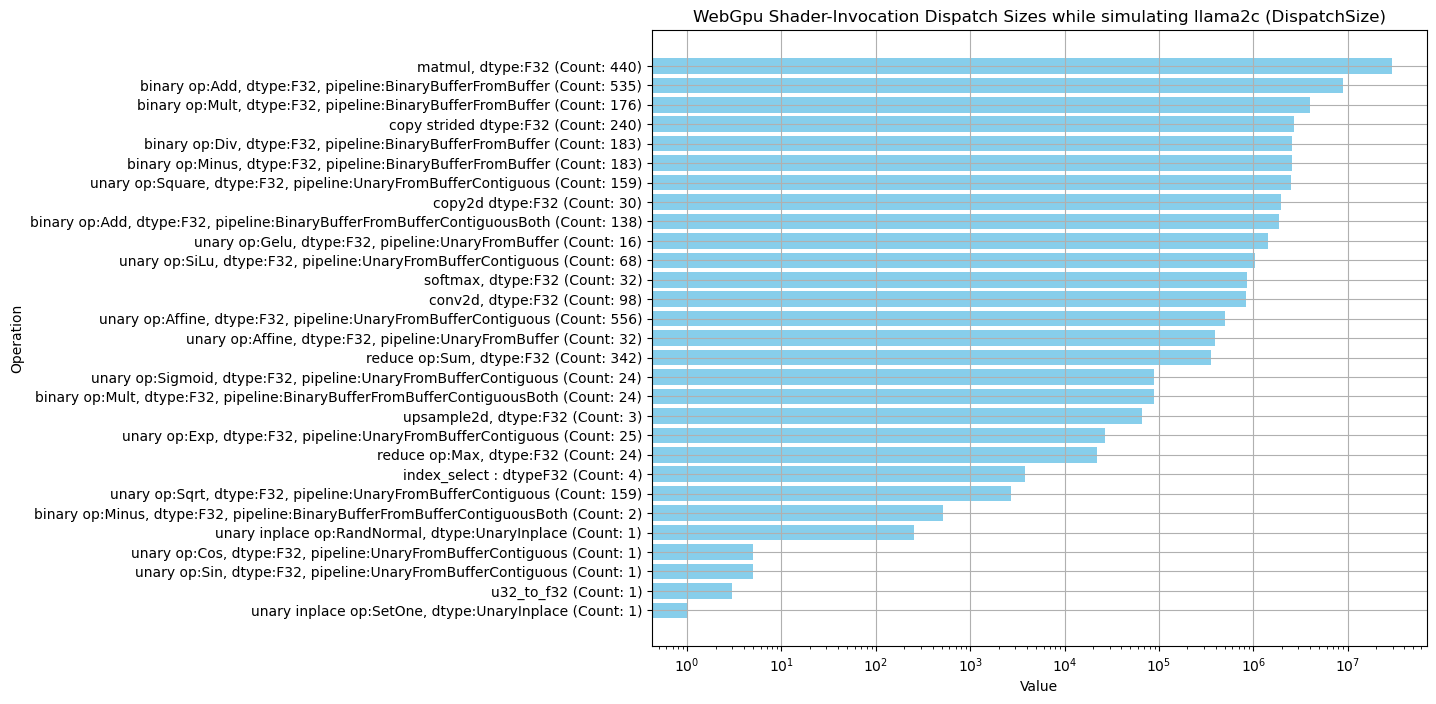

In [13]:
import json
import matplotlib.pyplot as plt

# Load the JSON data
with open('candle-examples/wgpu_infostable_defusion_small.json', 'r') as file:
    data = json.load(file)

# Separate the data by measurement type
duration_data = [op for op in data if op['m_type'] == 'Duration']
output_size_data = [op for op in data if op['m_type'] == 'OutputSize']
dispatch_size_data = [op for op in data if op['m_type'] == 'DispatchSize']

# Function to process data for plotting
def process_data(data):
    for operation in data:
        operation['value'] = operation['count'] * operation['mean']
    
    sorted_operations = sorted(data, key=lambda x: x['value'], reverse=True)
    
    labels = [f"{op['label']} (Count: {op['count']})" for op in sorted_operations]
    values = [op['value'] for op in sorted_operations]
    total_sum = sum(values)
    
    # Print the operations along with their values
    print(f"Total sum for {data[0]['m_type']}: {total_sum}")
    print(f"Operations sorted by total {data[0]['m_type'].lower()} for {data[0]['m_type']}:")
    for operation in sorted_operations:
        print(f"Operation: {operation['label']}, {data[0]['m_type']}: {operation['value']}, Count: {operation['count']} Perc:{operation['value']/total_sum:.2%}")
    
    return labels, values

# Process data for each measurement type
duration_labels, duration_values = process_data(duration_data)
output_size_labels, output_size_values = process_data(output_size_data)
dispatch_size_labels, dispatch_size_values = process_data(dispatch_size_data)

# Function to plot data
def plot_data(labels, values, title):
    plt.figure(figsize=(10, 8))
    plt.barh(labels, values, color='skyblue')
    plt.grid()
    plt.xscale('log')
    plt.xlabel('Value')
    plt.ylabel('Operation')
    plt.title(title)
    plt.gca().invert_yaxis()  # To have the longest value at the top
    plt.show()

# Plot data for each measurement type
plot_data(duration_labels, duration_values, 'WebGpu Shader-Invocation Durations while simulating llama2c (Duration)')
plot_data(output_size_labels, output_size_values, 'WebGpu Shader-Invocation Output Sizes while simulating llama2c (OutputSize)')
plot_data(dispatch_size_labels, dispatch_size_values, 'WebGpu Shader-Invocation Dispatch Sizes while simulating llama2c (DispatchSize)')